In [489]:
import os
from rdkit import Chem
import numbers
import pandas as pd
from rdkit.Chem import Descriptors

In [490]:
pdb_ligand_smiles = pd.DataFrame(columns = ['pdbid','ligand','smiles'])
pdb_ligand_smiles


,pdbid,ligand,smiles


In [491]:
def ligand_smiles(entry_id='7t3y'):
    if os.path.isdir(f'./{entry_id}'):
        ligand_paths = f'./{entry_id}'
        ligand_path = os.listdir(ligand_paths)
        if entry_id in pdb_ligand_smiles.values:
            return
        else:
            try:
                for i in ligand_path:
                    if i[-3:] == 'sdf':
                        m = Chem.SDMolSupplier(f'./{entry_id}/{i}')
                        smiles = Chem.MolToSmiles(m[0])
                        if 'C' in smiles:
                            pdb_ligand_smiles.loc[len(pdb_ligand_smiles.index)] = [entry_id, i[:-10], smiles]
                        else:
                            return
                    else:
                        continue
            except:
                return
    else:
        return None


In [492]:
ligand_smiles('7T3Y')

In [493]:
pdb_path = os.listdir(r'./')
for i in pdb_path:
    ligand_smiles(i)

In [494]:
pdb_ligand_smiles


,pdbid,ligand,smiles
0,7T3Y,F8C,CC(C)CC(NC(=O)OC1CC2(CCN(C(=O)C(C)C)CC2)C1)C(=...
1,7T3Y,F5L,CC(C)CC(NC(=O)OC1CC2(CCN(C(=O)C(C)C)CC2)C1)C(=...
2,7WHD,NAG,CC(=O)NC1C(O)OC(CO)C(O)C1O
3,7S5P,NAG,CC(=O)NC1C(O)OC(CO)C(O)C1O
4,7S5P,EDO,OCCO
...,...,...,...
2125,5S6Z,WUM,CN(C)Cc1csc(N)n1
2126,5S6Z,CIT,O=C(O)CC(O)(CC(=O)O)C(=O)O
2127,5SMA,NZD,CN1CCN(C(=O)Nc2ccccc2)CC1
2128,7SGH,99W,CC(C)CC(NC(=O)CNc1c(F)cc(F)cc1F)C(=O)NC(C=N)CC...


In [495]:
discard_comp_ids = [
    'CA','PO4','CL','NAG','EDO','SO4','ZN','CD','DMS','TFA','CIT',
]

pdb_ligand_smiles_washed = pdb_ligand_smiles[~pdb_ligand_smiles['ligand'].isin(discard_comp_ids)]
pdb_ligand_smiles_washed=pdb_ligand_smiles_washed.reset_index(drop=True)
pdb_ligand_smiles_washed

,pdbid,ligand,smiles
0,7T3Y,F8C,CC(C)CC(NC(=O)OC1CC2(CCN(C(=O)C(C)C)CC2)C1)C(=...
1,7T3Y,F5L,CC(C)CC(NC(=O)OC1CC2(CCN(C(=O)C(C)C)CC2)C1)C(=...
2,5S3I,W1P,CC1=NN(c2ccccc2)C(=O)C1
3,6VH2,QZ4,O=C(NC(CC1CCCCC1)C(=O)NC(CO)CC1CCNC1=O)OC1CCC(...
4,5RGW,UGM,N#Cc1cncc(CC(=O)Nc2cccnc2)c1
...,...,...,...
1549,6XHM,V2M,COc1cccc2[nH]c(C(=O)NC(CC(C)C)C(=O)NC(CC3CCNC3...
1550,5RV3,MYI,COc1ccc2[nH]cc(CC(=O)O)c2c1
1551,5S6Z,WUM,CN(C)Cc1csc(N)n1
1552,5SMA,NZD,CN1CCN(C(=O)Nc2ccccc2)CC1


In [496]:
drop_index = []
for index,row in pdb_ligand_smiles_washed.iterrows():
    m = Chem.MolFromSmiles(row['smiles'])
    if Descriptors.MolWt(m) < 181:
        drop_index.append(index)
pdb_ligand_smiles_washed = pdb_ligand_smiles_washed.drop(index=pdb_ligand_smiles_washed.index[drop_index])
pdb_ligand_smiles_washed=pdb_ligand_smiles_washed.reset_index(drop=True)
pdb_ligand_smiles_washed
pdb_ligand_smiles_washed.to_csv('pdb_ligand_smiles.csv',index=False)

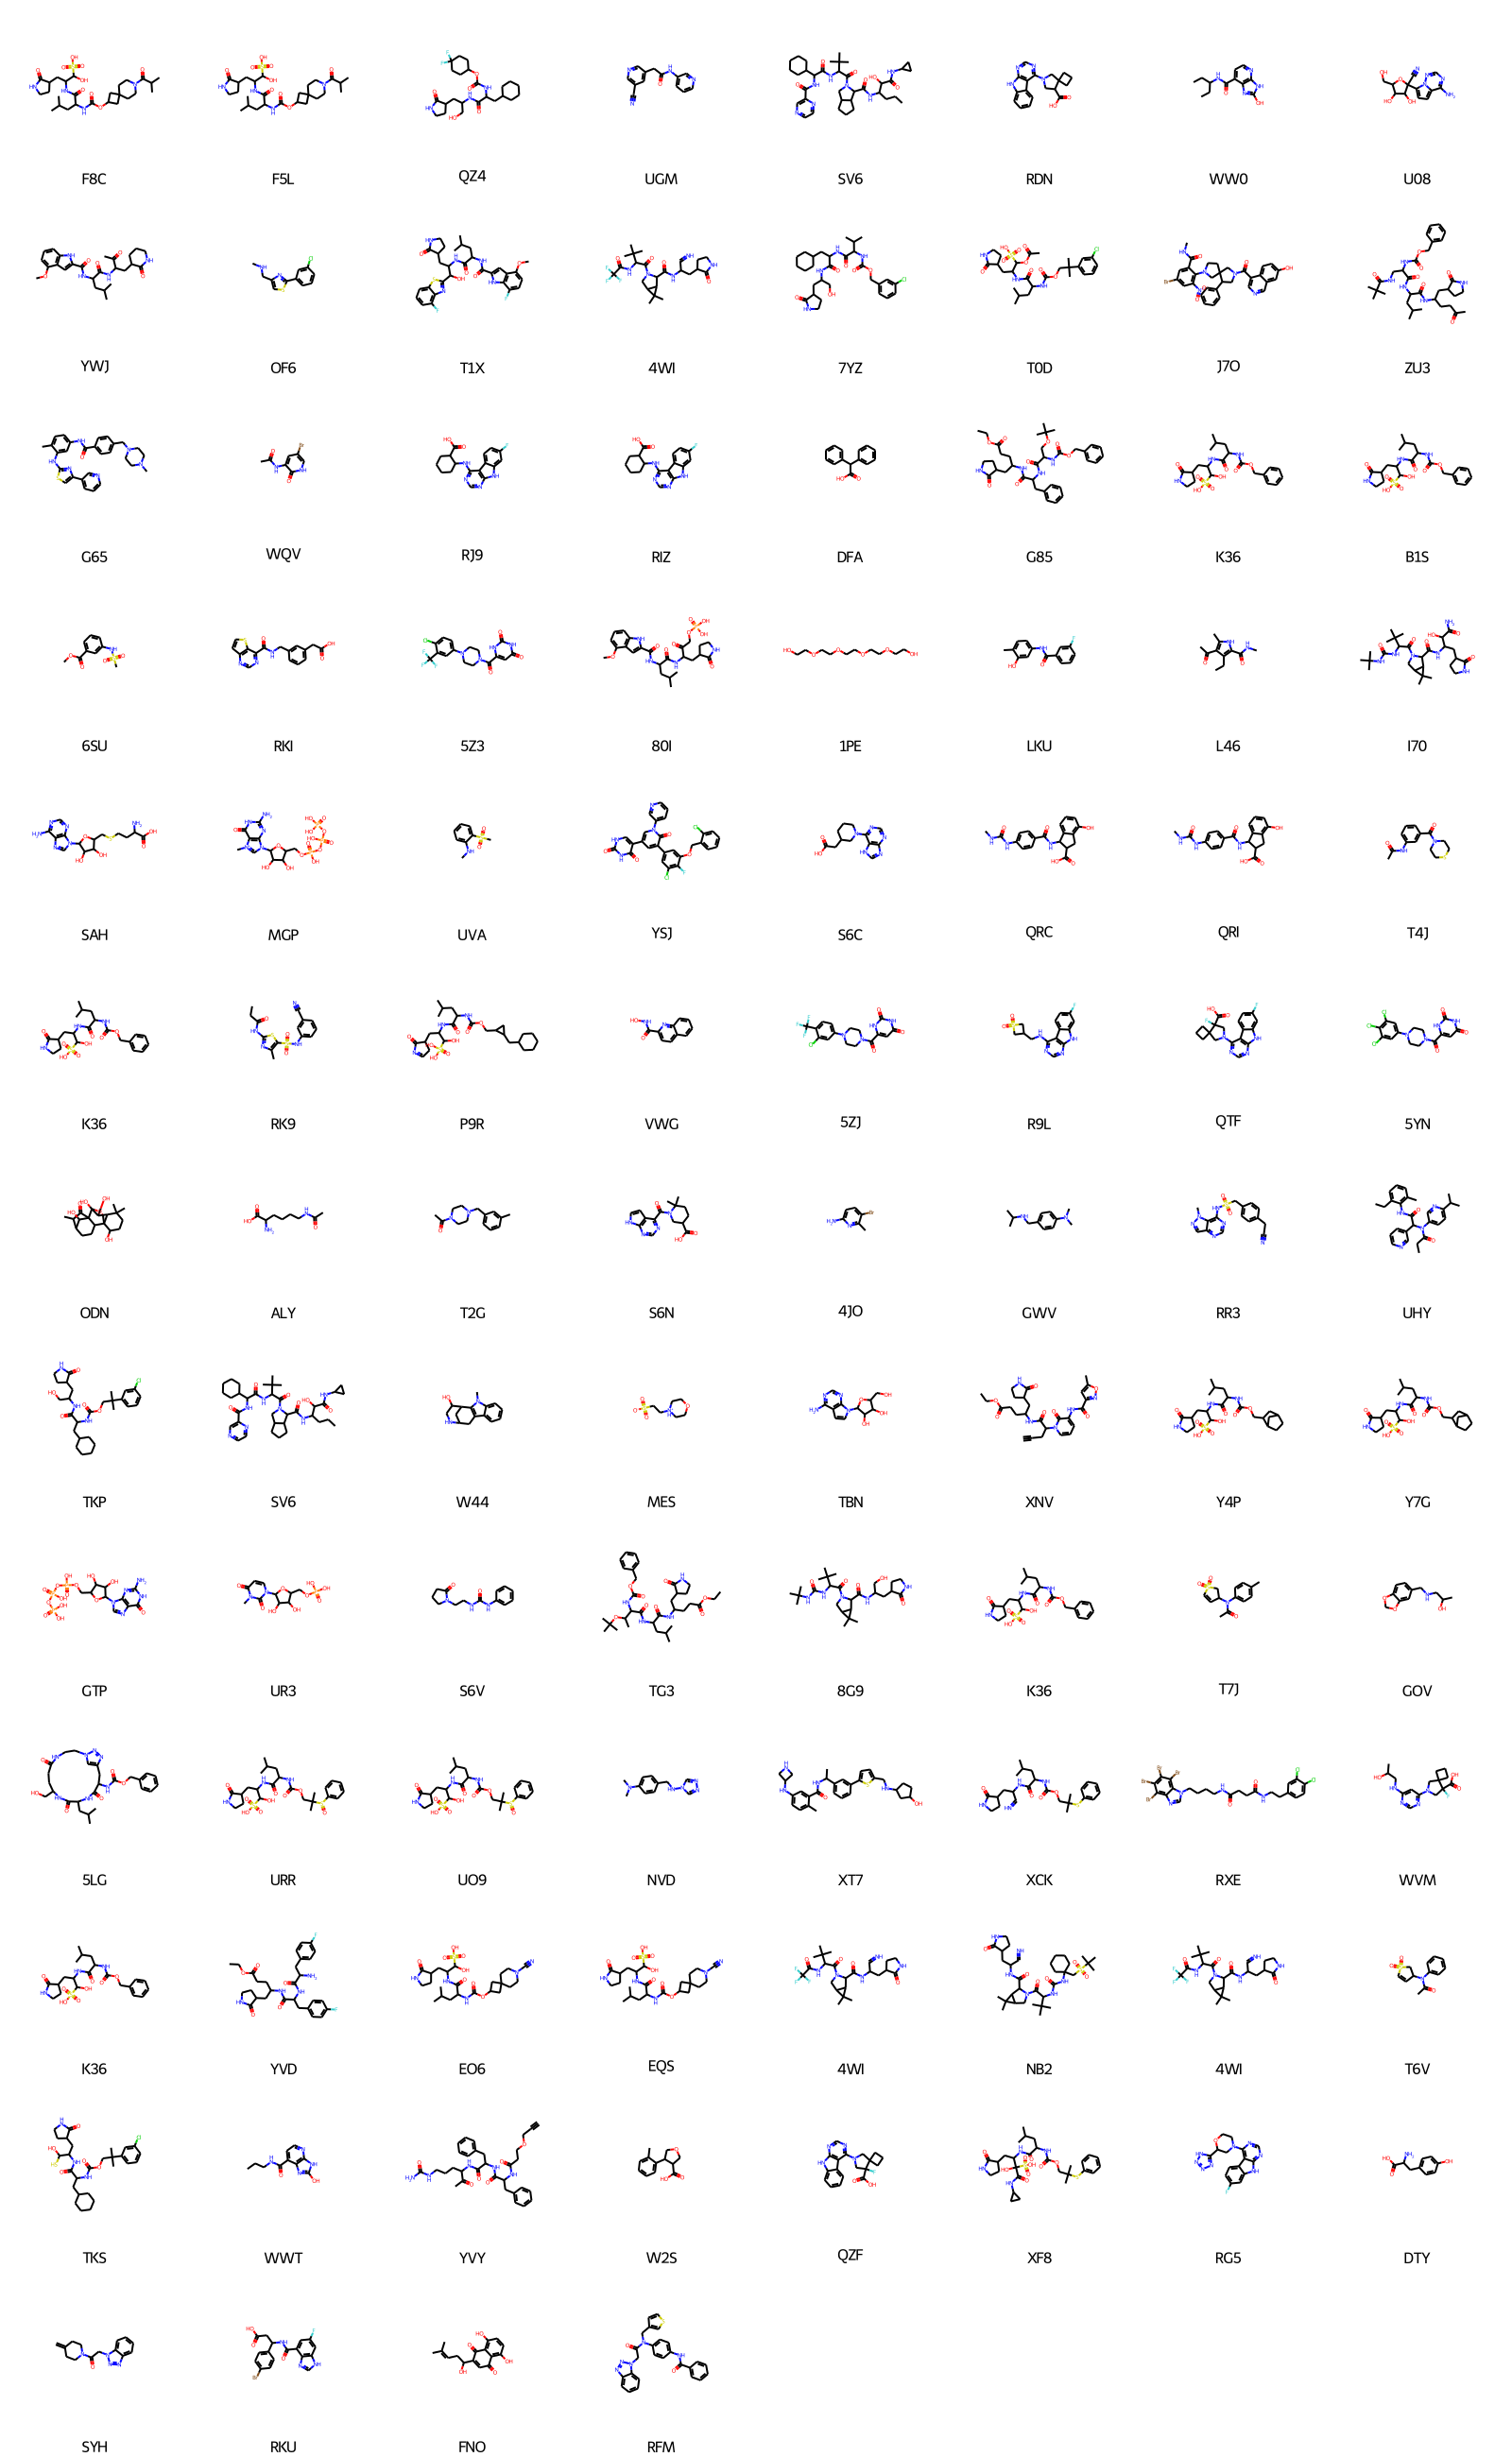

In [497]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in pdb_ligand_smiles_washed['smiles'].tolist()][:100], 
                     molsPerRow=8, 
                     subImgSize=(200, 200), 
                    #  maxMols = 100,
                     legends=pdb_ligand_smiles_washed['ligand'].tolist()[:100]
                     )